In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [19]:
#读入数据
hr = pd.read_csv('hr_train.csv')  #训练集
hr_test = pd.read_csv('hr_test.csv')   #测试集
x, y = hr.drop(columns='left'),hr['left']      
x_test,y_test = hr_test.drop(columns='left'),hr_test['left']

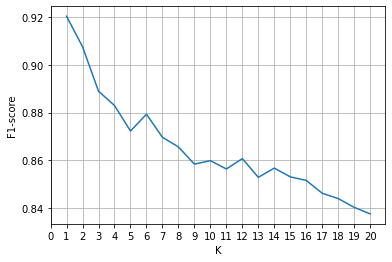

In [3]:
#KNN
#k值调参
k_range = range(1,21)    #k值从1到30
cv_scores = []   #用来存放每个k值对应模型的结果值

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv = 10, scoring='f1')  #10折交叉验证
    cv_scores.append(scores.mean())

plt.plot(k_range, cv_scores)
plt.xlabel('K')
plt.xticks(range(0,21))
plt.grid()
plt.ylabel('F1-score')
plt.show()

In [4]:
knn = KNeighborsClassifier(n_neighbors=1,p=2)
knn.fit(x,y)
#评估
print('accuracy: %.4f' % knn.score(x_test,y_test))   #准确度
y_score = knn.predict_proba(x_test)[:,1]   
y_pred = knn.predict(x_test)
prec,rec,f1,_, = precision_recall_fscore_support(y_test, y_pred,average="binary")

print('precision: %.4f' % prec)
print('recall: %.4f' % rec)
print('f1: %.4f' % f1)
print('AUC: %.4f' % roc_auc_score(y_test, y_score))

#混淆矩阵
confusion_matrix(y_test, y_pred,labels=[1,0])

accuracy: 0.9642
precision: 0.9050
recall: 0.9523
f1: 0.9280
AUC: 0.9602


array([[1038,   52],
       [ 109, 3301]], dtype=int64)

In [6]:
#SVM
#设置参数范围
parameters = {'C': range(1,20,2),
              'gamma': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000],
              'kernel': ['rbf']}
svc = SVC()
clf = GridSearchCV(svc, parameters, cv=10, n_jobs=-1, scoring='f1')
clf.fit(x,y)
print(clf.best_params_)
print(clf.best_score_)

{'C': 13, 'gamma': 10, 'kernel': 'rbf'}
0.9380234411219697


In [8]:
svm = SVC(gamma=10,C=13, probability=True)
svm.fit(x,y)
#评估
print('accuracy: %.4f' % svm.score(x_test,y_test))   #准确度
y_score= svm.predict_proba(x_test)[:,1]   
y_pred = svm.predict(x_test)
prec,rec,f1,_, = precision_recall_fscore_support(y_test, y_pred,average="binary")

print('precision: %.4f' % prec)
print('recall: %.4f' % rec)
print('f1: %.4f' % f1)
print('AUC: %.4f' % roc_auc_score(y_test, y_score))
confusion_matrix(y_test, y_pred,labels=[1,0])

accuracy: 0.9678
precision: 0.9315
recall: 0.9358
f1: 0.9336
AUC: 0.9799


array([[1020,   70],
       [  75, 3335]], dtype=int64)

In [10]:
#logistic回归
#特征变换
poly = PolynomialFeatures(2)
x_p = poly.fit_transform(x)
x_test_p = poly.fit_transform(x_test)    #带有交叉项和平方项

LR = linear_model.LogisticRegression(penalty='l1',solver='liblinear')
LR.fit(x_p,y)
#评估
print('accuracy: %.4f' % LR.score(x_test_p,y_test))   #准确度
y_score = LR.predict_proba(x_test_p)[:,1]   
y_pred = LR.predict(x_test_p)
prec,rec,f1,_, = precision_recall_fscore_support(y_test, y_pred,average="binary")
#prec
print('precision: %.4f' % prec)
print('recall: %.4f' % rec)
print('f1: %.4f' % f1)
print('AUC: %.4f' % roc_auc_score(y_test, y_score))
confusion_matrix(y_test, y_pred,labels=[1,0])

accuracy: 0.9520
precision: 0.8995
recall: 0.9028
f1: 0.9011
AUC: 0.9693


array([[ 984,  106],
       [ 110, 3300]], dtype=int64)

In [13]:
#决策树
hr = pd.read_csv('hr_train_tree.csv')
y = hr['left']
x = hr.drop(columns='left')
hr_test = pd.read_csv('hr_test_tree.csv')
y_test = hr_test['left']
x_test = hr_test.drop(columns='left')

x = pd.get_dummies(x)
x_test = pd.get_dummies(x_test)

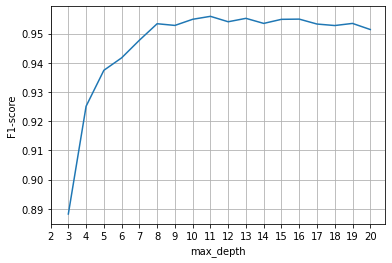

In [15]:
#max_depth值调参
m_range = range(3,21)    #k值从1到30
cv_scores = []   #用来存放每个max_depth值对应模型的结果值

for m in m_range:
    DT = tree.DecisionTreeClassifier(criterion='entropy', max_depth=m)
    scores = cross_val_score(DT, x, y, cv = 10, scoring='f1')  #10折交叉验证
    cv_scores.append(scores.mean())

plt.plot(m_range, cv_scores)
plt.xlabel('max_depth')
plt.xticks(range(2,21))
plt.grid()
plt.ylabel('F1-score')
plt.show()


In [16]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
clf.fit(x,y)
#评估
print('accuracy: %.4f' % clf.score(x_test,y_test))   #准确度
y_score = clf.predict_proba(x_test)[:,1]   
y_pred = clf.predict(x_test)
prec,rec,f1,_, = precision_recall_fscore_support(y_test, y_pred,average="binary")

print('precision: %.4f' % prec)
print('recall: %.4f' % rec)
print('f1: %.4f' % f1)
print('AUC: %.4f' % roc_auc_score(y_test, y_score))
confusion_matrix(y_test, y_pred,labels=[1,0])

accuracy: 0.9802
precision: 0.9726
recall: 0.9450
f1: 0.9586
AUC: 0.9776


array([[1030,   60],
       [  29, 3381]], dtype=int64)

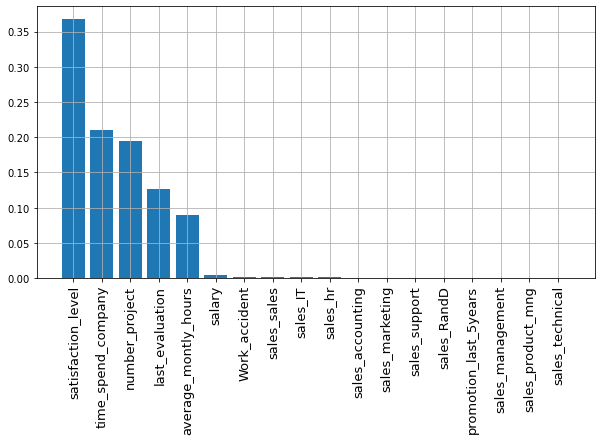

In [17]:
#绘制决策树特征重要性
np.set_printoptions(suppress=True)
features = list(x.columns)
importances = list(np.around(clf.feature_importances_ ,6))
fea = pd.Series(importances, index=features)
fea.sort_values(ascending = False,inplace = True)
plt_y=np.array(fea)
plt_x=np.array(fea.index)

plt.figure(figsize=(10,5))
plt.xticks(range(len(plt_x)), plt_x)
plt.bar(range(len(plt_x)), plt_y)

plt.xticks(rotation=90,fontsize=13)
plt.grid()
plt.show()

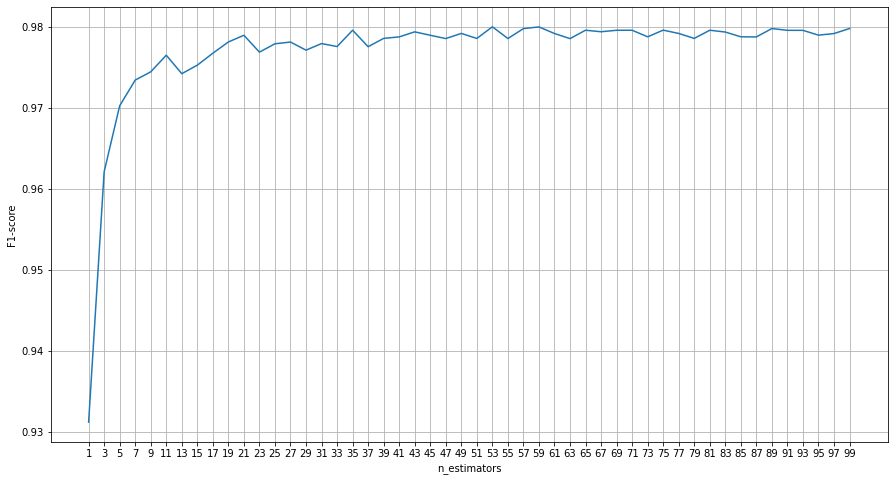

In [20]:
#随机森林
#对n_estimators调参
n_range = range(1,101,2)    
cv_scores = []   #用来存放每个n值对应模型的结果值

for n in n_range:
    rf = RandomForestClassifier(n_estimators=n)
    scores = cross_val_score(rf, x, y, cv = 10, scoring='f1',n_jobs=-1)  #5折交叉验证
    cv_scores.append(scores.mean())

plt.figure(figsize=(15,8))   
plt.plot(n_range, cv_scores)
plt.xlabel('n_estimators')
plt.xticks(range(1,101,2))
plt.grid()
plt.ylabel('F1-score')
plt.show()

In [21]:
clf = RandomForestClassifier(n_estimators=30)
clf.fit(x, y)
#评估
print('accuracy: %.4f' % clf.score(x_test,y_test))   #准确度
y_score = clf.predict_proba(x_test)[:,1]   
y_pred = clf.predict(x_test)
prec,rec,f1,_, = precision_recall_fscore_support(y_test, y_pred,average="binary")

print('precision: %.4f' % prec)
print('recall: %.4f' % rec)
print('f1: %.4f' % f1)
print('AUC: %.4f' % roc_auc_score(y_test, y_score))
confusion_matrix(y_test, y_pred,labels=[1,0])

accuracy: 0.9876
precision: 0.9896
recall: 0.9587
f1: 0.9739
AUC: 0.9914


array([[1045,   45],
       [  11, 3399]], dtype=int64)